# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Vitória, Espirito Santo, Brazil**, or **Brazil** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Vitória, Espirito Santo, Brazil** to Ann Arbor, USA. In that case at least one source file must be about **Vitória, Espirito Santo, Brazil**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Vitória, Espirito Santo, Brazil** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# 1 Region and Domain

**State the region and the domain category that your data sets are about.**

Region:

- Vitória, Espirito Santo, Brazil
- Vila Velha, Espirito Santo, Brazil

Domain category:

- religious events or traditions

# 2  Research Question

**You must state a question about the domain category and region that you identified as being
interesting.**

What are the religion who get the most amount of followers among people who have the least income for each city? And among the people with the highest income?

# 3 Links

**You must provide at least two links to publicly accessible datasets. These could be links to
files such as CSV or Excel files, or links to websites which might have data in tabular form,
such as Wikipedia pages.**

- [site with the provided data](https://cidades.ibge.gov.br/brasil/es/vitoria/pesquisa/23/22107)
- [Vitória](https://github.com/Galadriel-LORD/Data-Science-course-on-coursera/blob/main/Censo%20-%20Vit%C3%B3ria.csv)
- [Vila Velha](https://github.com/Galadriel-LORD/Data-Science-course-on-coursera/blob/main/Censo%20-%20Vila%20Velha.csv)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [2]:
# getting the dataframes and cleaning

#dataframe from vitoria
vix = pd.read_csv('vix.csv', sep=';', error_bad_lines=False, warn_bad_lines=False)
vix = vix.set_index(vix['Nível'])
vix = vix.drop(['Nível', 'Unidade'], axis=1)
vix['Index'] = np.arange(0, len(vix))
index = vix.pop('Index') # drop the column from df and store in the index variable
vix.insert(loc=0, column='Index', value=index)
vix = vix.rename(columns={'Indicador':'Religion','2010':'People'})
vix = vix.loc['12.1.1':'12.1.2'].drop(['12.1.2','12.1.1'])

#dataframe from vv
vv = pd.read_csv('vv.csv', sep=';', error_bad_lines=False, warn_bad_lines=False)
vv = vv.set_index(vv['Nível'])
vv = vv.drop(['Nível', 'Unidade'], axis=1)
vv['Index'] = np.arange(0, len(vv))
index = vv.pop('Index') # drop the column from df and store in the index variable
vv.insert(loc=0, column='Index', value=index)
vv = vv.rename(columns={'Indicador':'Religion','2010':'People'})
vv = vv.loc['12.1.1':'12.1.2'].drop(['12.1.2','12.1.1'])



In [3]:
#getting the two subsets of interest for each city

#vix
#people with the lowest income
least_income = vix.loc['12.1.1.2':'12.1.1.3'].drop(['12.1.1.2', '12.1.1.2.1', '12.1.1.3']) # slicing troughout the interest region of df
least_income = least_income.rename(columns={'People':'People with less than 1/8 of minimum wage of vitoria'}).drop(labels='Index',axis=1)
least_income = least_income.fillna(value=0)
least_income = least_income.set_index('Religion')

#people with the highest income
highest_income = vix.loc['12.1.1.10':].drop(['12.1.1.10', '12.1.1.10.1'])
highest_income = highest_income.rename(columns={'People':'People with more than 10 minimum wages of vitoria'}).drop(labels='Index',axis=1)
highest_income = highest_income.fillna(value=0)
highest_income = highest_income.set_index('Religion')

#vv

#people with the lowest income
least_incomevv = vv.loc['12.1.1.2':'12.1.1.3'].drop(['12.1.1.2', '12.1.1.2.1', '12.1.1.3']) # slicing troughout the interest region of df
least_incomevv = least_incomevv.rename(columns={'People':'People with less than 1/8 of minimum wage of vila velha'}).drop(labels='Index',axis=1)
least_incomevv = least_incomevv.fillna(value=0)
least_incomevv = least_incomevv.set_index('Religion')

#people with the highest income
highest_incomevv = vv.loc['12.1.1.10':].drop(['12.1.1.10', '12.1.1.10.1'])
highest_incomevv = highest_incomevv.rename(columns={'People':'People with more than 10 minimum wages of vila velha'}).drop(labels='Index',axis=1)
highest_incomevv = highest_incomevv.fillna(value=0)
highest_incomevv = highest_incomevv.set_index('Religion')

highest_incomevv.head()

,People with more than 10 minimum wages of vila velha
Religion,
Sem religião,1054.0
Católica apostólica romana,6808.0
Espírita,548.0
Evangélica,2308.0
Não determinada,671.0


In [4]:
#merging the 2 dataframes of vix, the 2 df of vv, and then, merge them into a single df

new_vix = least_income.merge(highest_income, how='inner', left_index=True, right_index=True)
new_vv = least_incomevv.merge(highest_incomevv, how='inner', left_index=True, right_index=True)
censo = pd.merge(new_vix, new_vv, left_index=True, right_index=True)
censo.index.name = None
censo

,People with less than 1/8 of minimum wage of vitoria,People with more than 10 minimum wages of vitoria,People with less than 1/8 of minimum wage of vila velha,People with more than 10 minimum wages of vila velha
Sem religião,395.0,1546.0,493.0,1054.0
Católica apostólica romana,390.0,13624.0,734.0,6808.0
Espírita,0.0,1277.0,0.0,548.0
Evangélica,501.0,2902.0,673.0,2308.0
Não determinada,145.0,640.0,70.0,671.0
Missionária,67.0,1606.0,159.0,1027.0
Pentecostal,290.0,656.0,444.0,610.0
Outras religiosidades,14.0,628.0,24.0,389.0


In [5]:
# creating the percentage columns and adding to the data frame

# x is the actual value on the column, that will be divided by the sum of all values of that column to get the percentage
#vix
perc_vix_poor = censo['People with less than 1/8 of minimum wage of vitoria'].apply(lambda x: (x/censo['People with less than 1/8 of minimum wage of vitoria'].sum())*100)
perc_vix_rich = censo['People with more than 10 minimum wages of vitoria'].apply(lambda x: (x/censo['People with more than 10 minimum wages of vitoria'].sum())*100)
#vv
perc_vv_poor = censo['People with less than 1/8 of minimum wage of vila velha'].apply(lambda x: (x/censo['People with less than 1/8 of minimum wage of vila velha'].sum())*100)
perc_vv_rich = censo['People with more than 10 minimum wages of vila velha'].apply(lambda x: (x/censo['People with more than 10 minimum wages of vila velha'].sum())*100)

# insert the created columns in the desired position (right sided of the correspodent column)
#vix
censo.insert(loc=censo.columns.get_loc('People with less than 1/8 of minimum wage of vitoria') + 1, column='People with less than 1/8 of minimum wage of vitoria (%)', value=perc_vix_poor)
censo.insert(loc=censo.columns.get_loc('People with more than 10 minimum wages of vitoria') + 1, column='People with more than 10 minimum wages of vitoria (%)', value=perc_vix_rich)

#vv
censo.insert(loc=censo.columns.get_loc('People with less than 1/8 of minimum wage of vila velha') + 1, column='People with less than 1/8 of minimum wage of vila velha (%)', value=perc_vv_poor)
censo.insert(loc=censo.columns.get_loc('People with more than 10 minimum wages of vila velha') + 1, column='People with more than 10 minimum wages of vila velha (%)', value=perc_vv_rich)


In [6]:
censo

,People with less than 1/8 of minimum wage of vitoria,People with less than 1/8 of minimum wage of vitoria (%),People with more than 10 minimum wages of vitoria,People with more than 10 minimum wages of vitoria (%),People with less than 1/8 of minimum wage of vila velha,People with less than 1/8 of minimum wage of vila velha (%),People with more than 10 minimum wages of vila velha,People with more than 10 minimum wages of vila velha (%)
Sem religião,395.0,21.920089,1546.0,6.757288,493.0,18.983442,1054.0,7.856877
Católica apostólica romana,390.0,21.642619,13624.0,59.548057,734.0,28.263381,6808.0,50.749161
Espírita,0.0,0.000000,1277.0,5.581538,0.0,0.000000,548.0,4.084980
Evangélica,501.0,27.802442,2902.0,12.684121,673.0,25.914517,2308.0,17.204622
Não determinada,145.0,8.046615,640.0,2.797325,70.0,2.695418,671.0,5.001864
Missionária,67.0,3.718091,1606.0,7.019538,159.0,6.122449,1027.0,7.655609
Pentecostal,290.0,16.093230,656.0,2.867258,444.0,17.096650,610.0,4.547149
Outras religiosidades,14.0,0.776915,628.0,2.744875,24.0,0.924143,389.0,2.899739


# Plotting to answer the proposed question

In [7]:
# use the 'seaborn-colorblind' style
#plt.style.available
plt.style.use('seaborn-white')

<IPython.core.display.Javascript object>


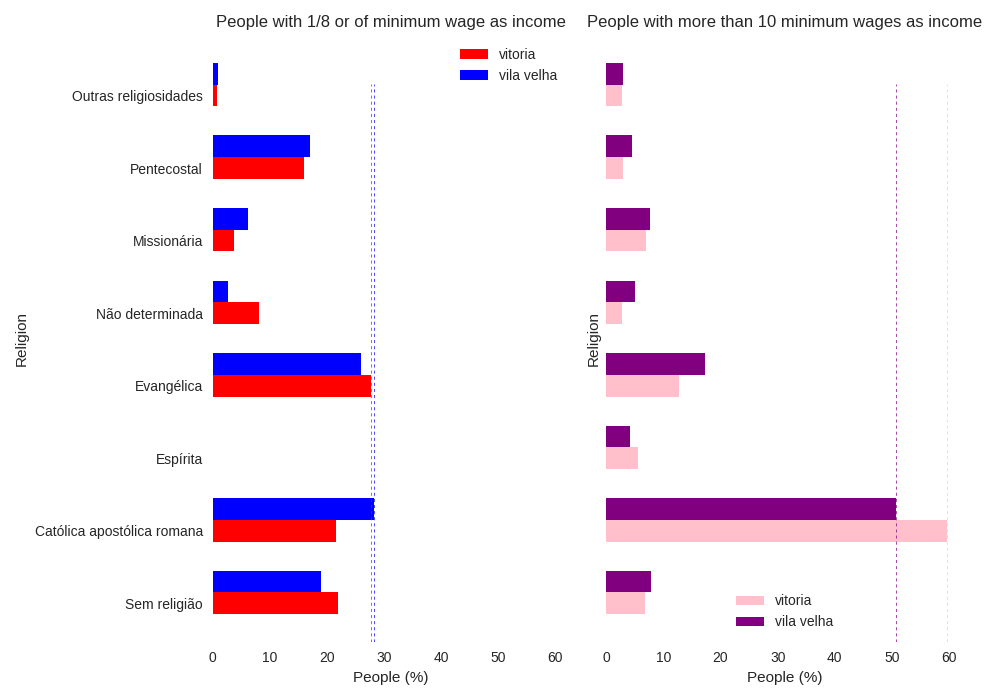

In [8]:
fig3, (ax3, ax4) = plt.subplots(1,2,sharey=True, sharex=True,figsize=(10,7))

height = 0.3
yvals  = np.arange(8)
new_yvals = np.arange(.3, 8.3)
ax3.barh(yvals, censo['People with less than 1/8 of minimum wage of vitoria (%)'], height=height, label='vitoria', color='red')
ax3.barh(new_yvals, width=censo['People with less than 1/8 of minimum wage of vila velha (%)'], height=height, label='vila velha', color='blue')
ax3.legend()
ax3.set_title('People with 1/8 or of minimum wage as income')
ax3.set_ylabel('Religion')
ax3.set_xlabel('People (%)')
ax3.set_frame_on(False)
plt.ylabel('Religion')

linemax = 0.92
linemin = 0
ax3.axvline(x=censo['People with less than 1/8 of minimum wage of vitoria (%)'].max(),
            ymin=linemin, ymax=linemax, c='red', linestyle=':', linewidth=0.5  )
ax3.axvline(x=censo['People with less than 1/8 of minimum wage of vila velha (%)'].max(),
            ymin=linemin, ymax=linemax, c='blue', linestyle=':', linewidth=0.5  )



ax4.barh(yvals, censo['People with more than 10 minimum wages of vitoria (%)'], height=height, label='vitoria', color='pink')
ax4.barh(new_yvals, width=censo['People with more than 10 minimum wages of vila velha (%)'], height=height, label='vila velha', color='purple')
ax4.legend(loc='best')
ax4.set_title('People with more than 10 minimum wages as income')

ax4.set_xlabel('People (%)')
ax4.set_frame_on(False)


linemax = 0.92
linemin = 0
ax4.axvline(x=censo['People with more than 10 minimum wages of vitoria (%)'].max(),
            ymin=linemin, ymax=linemax, c='pink', linestyle=':', linewidth=0.5  )
ax4.axvline(x=censo['People with more than 10 minimum wages of vila velha (%)'].max(),
            ymin=linemin, ymax=linemax, c='purple', linestyle=':', linewidth=0.5  )


plt.yticks(np.arange(8), censo.index.tolist())
plt.tight_layout()


# 5 Discussion

The proposed topic of my work was a graphic prodution that was capable of informing the viewer about the religion that has the most amount of followers among the people with the lowest income and the highest income. The datasets chosen were 2 csv files of a census website, one from my city vitoria, and another from a neighboor city, vila velha. The csv files, had messy data with much useless info too. The datasets were cleaned, and manipulated. With a much clear single dataset, was possible to create a sucinct barplot to answer the proposed question.

As we can see, in the city of vitoria, the most followed religion among the people with the least income is Evangélica, with almost 30% of the followers. Among the people with the highest income, the most followed religion is Católica apostólica romana, with 60% of the followers. In the city of vila velha, the most followed religion among the people with the least income is Católica apostólica romana, with almost 30% of the followers. Among the people with the highest income, the most followed religion is also Católica apostólica romana, but with 50% of the followers. With this info, we can also conclude that the Religion Católica apostólica romana can be stated as "rich people religion".
